Please Fill in your name below:

In [ ]:
NAME = "Mohammed Ali Ali El_Naggar"

---

# Deep Learning
# Assignment 2: Neural Networks

**Please follow the following instructions for your answers to be graded correctly**:
- Do not use any loops unless stated.
- Do not change any of the functions names.
- Inside the functions, make sure to write your code between the comments "# YOUR CODE STARTS HERE " and "# YOUR CODE ENDS HERE ". **Do not** edit any code outside these comments inside the functions.
- You're allowed to edit the cells that don't contain function definition.
- You will encounter some locked (read-only) and empty cells. Leave those as they are, you're not allowed to edit them.
- Before you submit your assignment, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Regression using Tensorflow Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

### Data
The medical insurance dataset attached with the assignment aims to predict the individual medical costs billed by health insurance based on some features: age, sex, bmi, children, smoker, region.

**Write the following function 'get_insurance_data' which does the following:**
- Reads the Medical insurance data (attached with the assignment) into a pandas dataframe
- Normalize the numerical features to the range [0, 1]
- Numerically encoding the categorical features. Note that there are generally two ways to do this:
    - Ordinal Encoding: Used for data that has natural ordering. eg. a feature describing How happy a customer is with service:\
Extremely Happy – 1 \
Happy – 2\
Neutral – 3\
Unhappy – 4 \
Extremely Unhappy – 5
    - One-Hot Encoding: Used for data that has no natural ordering. eg. a feature containing the breed of a dog: Doberman - Dalmatian - Labrador - German Shepherd. These can't be encoded as 0, 1, 2 and 3 because they have no natural ordering.
- Standardize the target label to zero mean and std 1. (Due to large range of the target values)
- Split the data into training and testing sets with ratio 3:1.

In [ ]:
def get_insurance_data(data_path):
    '''
    Read and preprocess the insurance data

    Arguments:
    data_path: the path of the insurance data file.

    Returns:
    x_train: training data array with shape (num of training samples, num of features)
    x_test: training data array with shape (num of testing samples, num of features)
    y_train: training labels array with shape (num of training samples,)
    y_test: testing labels array with shape (num of testing samples,)
    '''
    # YOUR CODE STARTS HERE
    df = pd.read_csv(data_path)
    X = df.drop(columns=["charges"])  # 'charges' is the target column
    y = df["charges"]
     # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numerical_cols),
            ('cat', OneHotEncoder(), categorical_cols)
        ]
    )

    X_processed = preprocessor.fit_transform(X)
    # Standardize the target label
    y = StandardScaler().fit_transform(y.values.reshape(-1, 1)).flatten()
    x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)
    # YOUR CODE ENDS HERE

    return x_train, x_test, y_train, y_test


### Model

**Write the following 'build_model' function which in which you should build the layers of your model and compile the model**
- Model layers: 3 dense layers. First and second layers should have 11 and 100 neurons respectively and relu activation. Output layer should have ?? neurons (what number? and should it have activation?)
- Use SGD optimizer
- Use the Mean Squared Error as your loss and Mean Absolute Error as your evaluation metric.

In [ ]:
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model(input_shape, lr, momentum = 0):
    '''
    Arguments:
    lr -- learning rate
    momentum -- momentum hyperparameter

    Returns:
    model: the compiled model. (See requirements specified above)
    '''
    tf.random.set_seed(42)

    # YOUR CODE STARTS HERE
    model = Sequential()
    # First Dense layer: 11 neurons with ReLU activation
    model.add(Dense(11, activation='relu', input_shape=(input_shape,)))
    # Second Dense layer: 100 neurons with ReLU activation
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))  # No activation function, so it's a linear output

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=lr, momentum=momentum),  # Using SGD optimizer
                  loss='mean_squared_error',  # Using MSE loss for regression
                  metrics=['mean_absolute_error'])


    # YOUR CODE ENDS HERE
    return model

### Hyperparameter Experiments

#### lr = 0.0001

In [ ]:
### fit your model using lr=0.0001, 200 epochs, momentum=0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
data_path ='/content/insurance.csv'
x_train, x_test, y_train, y_test =  get_insurance_data(data_path)
lr = 0.0001
epochs = 200
momentum = 0.0
input_shape = x_train.shape[1]  # Number of features in your training data
model = build_model(input_shape, lr, momentum)
# Fit the model with 10% of the data as validation
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_split=0.1,  # Use 10% of the data as validation data

)

# YOUR CODE ENDS HERE



Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1567 - mean_absolute_error: 0.8639 - val_loss: 1.1825 - val_mean_absolute_error: 0.8856
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1534 - mean_absolute_error: 0.8610 - val_loss: 1.1782 - val_mean_absolute_error: 0.8824
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1502 - mean_absolute_error: 0.8582 - val_loss: 1.1740 - val_mean_absolute_error: 0.8792
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1472 - mean_absolute_error: 0.8555 - val_loss: 1.1700 - val_mean_absolute_error: 0.8762
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1443 - mean_absolute_error: 0.8529 - val_loss: 1.1661 - val_mean_absolute_error: 0.8732
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1415 - mean_absolute_error: 0.8503 - val_loss: 1.1624 - val_mean_absolute_error: 0.8703
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1389 - mean_absolute_error: 0.8479 - val_loss: 1.1587 - v

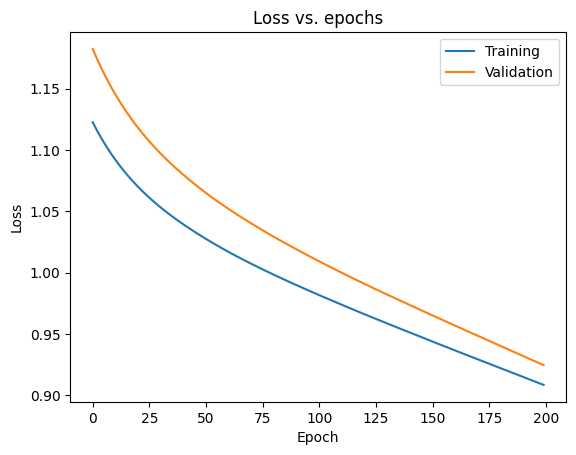

In [ ]:
# plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_materic = model.evaluate(
    x_test,
    y_test,
    batch_size=32
)

# Print the evaluation results
print(f"Test Loss with lr = 0.0001: {test_loss}")
print(f"Test MAE with lr = 0.0001: {test_materic}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9843 - mean_absolute_error: 0.7593 
Test Loss with lr = 0.0001: 0.9459071755409241
Test MAE with lr = 0.0001: 0.7343644499778748


#### lr = 0.001

In [ ]:
### fit your model using lr=0.001, 200 epochs, momentum = 0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
lr = 0.001
epochs = 200
momentum = 0.0
input_shape = x_train.shape[1]  # Number of features in your training data
model = build_model(input_shape, lr, momentum)
# Fit the model with 10% of the data as validation
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_split=0.1,  # Use 10% of the data as validation data

)
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0637 - mean_absolute_error: 0.7493 - val_loss: 1.0560 - val_mean_absolute_error: 0.7593
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0547 - mean_absolute_error: 0.7472 - val_loss: 1.0485 - val_mean_absolute_error: 0.7577
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0462 - mean_absolute_error: 0.7450 - val_loss: 1.0412 - val_mean_absolute_error: 0.7560
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0380 - mean_absolute_error: 0.7427 - val_loss: 1.0341 - val_mean_absolute_error: 0.7541
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0301 - mean_absolute_error: 0.7404 - val_loss: 1.0272 - val_mean_absolute_error: 0.7521
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0224 - mean_absolute_error: 0.7379 - val_loss: 1.0203 - val_mean_absolute_error: 0.7500
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0148 - mean_absolute_error: 0.7354 - val_loss

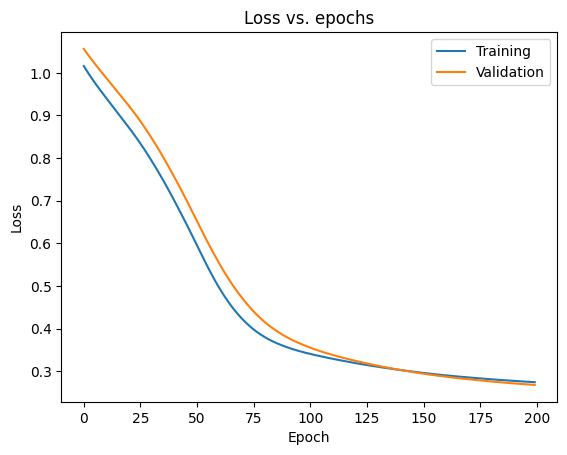

In [ ]:
# plotting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_materic = model.evaluate(
    x_test,
    y_test,

)

# Print the evaluation results
print(f"Test Loss with lr = 0.001: {test_loss}")
print(f"Test MAE with lr = 0.001: {test_materic}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2281 - mean_absolute_error: 0.3086 
Test Loss with lr = 0.001: 0.25223326683044434
Test MAE with lr = 0.001: 0.3185357451438904


#### lr = 0.1

In [ ]:
### fit your model using lr=0.1, 200 epochs, momentum=0
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
lr = 0.1
epochs = 200
momentum = 0.0
input_shape = x_train.shape[1]  # Number of features in your training data
model = build_model(input_shape, lr, momentum)
# Fit the model with 10% of the data as validation
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_split=0.1,  # Use 10% of the data as validation data

)
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7015 - mean_absolute_error: 0.6271 - val_loss: 0.2762 - val_mean_absolute_error: 0.3774
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3054 - mean_absolute_error: 0.3846 - val_loss: 0.2592 - val_mean_absolute_error: 0.3609
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2813 - mean_absolute_error: 0.3582 - val_loss: 0.2312 - val_mean_absolute_error: 0.3182
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2669 - mean_absolute_error: 0.3440 - val_loss: 0.2157 - val_mean_absolute_error: 0.2912
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2597 - mean_absolute_error: 0.3398 - val_loss: 0.2122 - val_mean_absolute_error: 0.2841
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2531 - mean_absolute_error: 0.3361 - val_loss: 0.2172 - val_mean_absolute_error: 0.2868
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2482 - mean_absolute_error: 0.3311 - val_los

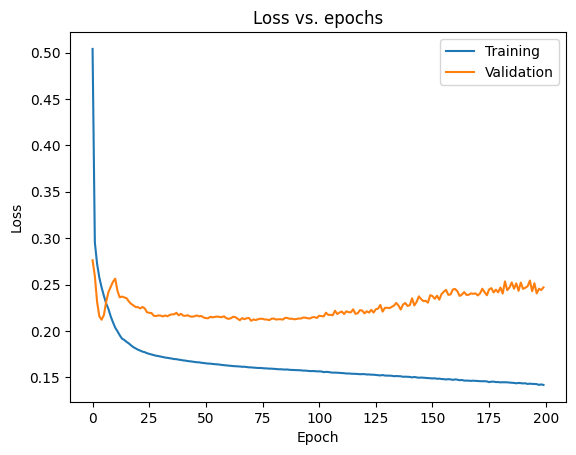

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_materic = model.evaluate(
    x_test,
    y_test,

)

# Print the evaluation results
print(f"Test Loss with lr = 0.1: {test_loss}")
print(f"Test MAE with lr = 0.1: {test_materic}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1981 - mean_absolute_error: 0.2581 
Test Loss with lr = 0.1: 0.21461865305900574
Test MAE with lr = 0.1: 0.26347988843917847


#### Question: What effect did you notice on the learning curve by changing the learning rate ?

[link text](https://) when learing rate is small model diverge but when it large it converge without high fluctuation but when  learing rate is very large model converg faster but fluctuoation occurs

#### Momentum = 0.3

In [ ]:
### fit your model using lr=0.001, 200 epochs, momentum = 0.3
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
lr = 0.001
epochs = 200
momentum = 0.3
input_shape = x_train.shape[1]  # Number of features in your training data
model = build_model(input_shape, lr, momentum)
# Fit the model with 10% of the data as validation
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_split=0.1,  # Use 10% of the data as validation data
)
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.0158 - mean_absolute_error: 0.7566 - val_loss: 1.0083 - val_mean_absolute_error: 0.7791
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9880 - mean_absolute_error: 0.7494 - val_loss: 0.9808 - val_mean_absolute_error: 0.7727
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9619 - mean_absolute_error: 0.7416 - val_loss: 0.9545 - val_mean_absolute_error: 0.7651
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9371 - mean_absolute_error: 0.7331 - val_loss: 0.9287 - val_mean_absolute_error: 0.7567
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9131 - mean_absolute_error: 0.7242 - val_loss: 0.9036 - val_mean_absolute_error: 0.7477
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8896 - mean_absolute_error: 0.7148 - val_loss: 0.8791 - val_mean_absolute_error: 0.7382
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8665 - mean_absolute_error: 0.7051 - val_los

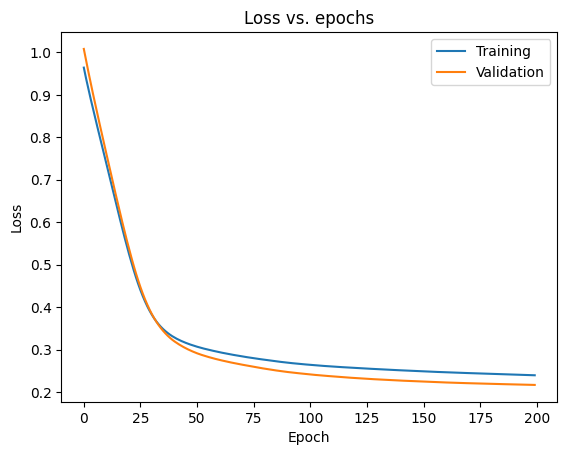

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_materic = model.evaluate(
    x_test,
    y_test,

)

# Print the evaluation results
print(f"Test Loss with lr = 0.1: {test_loss}")
print(f"Test MAE with lr = 0.1: {test_materic}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2081 - mean_absolute_error: 0.3098 
Test Loss with lr = 0.1: 0.22425636649131775
Test MAE with lr = 0.1: 0.3184691369533539


#### Momentum = 0.7

In [ ]:
### fit your model using lr=0.001,  200 epochs, momentum = 0.7
### set 10% of your data as validation data during training
# YOUR CODE STARTS HERE
lr = 0.001
epochs = 200
momentum = 0.7
input_shape = x_train.shape[1]  # Number of features in your training data
model = build_model(input_shape, lr, momentum)
# Fit the model with 10% of the data as validation
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_split=0.1,  # Use 10% of the data as validation data

)
# YOUR CODE ENDS HERE


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0897 - mean_absolute_error: 0.7569 - val_loss: 1.0134 - val_mean_absolute_error: 0.7445
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0171 - mean_absolute_error: 0.7507 - val_loss: 0.9588 - val_mean_absolute_error: 0.7308
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9581 - mean_absolute_error: 0.7337 - val_loss: 0.9082 - val_mean_absolute_error: 0.7119
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9044 - mean_absolute_error: 0.7126 - val_loss: 0.8587 - val_mean_absolute_error: 0.6918
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8525 - mean_absolute_error: 0.6899 - val_loss: 0.8089 - val_mean_absolute_error: 0.6700
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8003 - mean_absolute_error: 0.6656 - val_loss: 0.7579 - val_mean_absolute_error: 0.6473
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7469 - mean_absolute_error: 0.6401 - val_loss

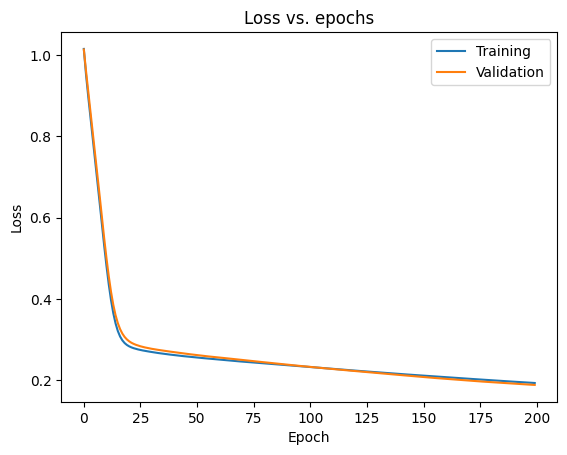

In [ ]:
# plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# evaluate the model on test data
# YOUR CODE STARTS HERE
test_loss, test_materic = model.evaluate(
    x_test,  y_test

)

# Print the evaluation results
print(f"Test Loss with lr = 0.1: {test_loss}")
print(f"Test MAE with lr = 0.1: {test_materic}")
# YOUR CODE ENDS HERE


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1672 - mean_absolute_error: 0.2515 
Test Loss with lr = 0.1: 0.1815863996744156
Test MAE with lr = 0.1: 0.26259490847587585


#### Question: What effect did you notice on the learning curve by changing the momentum hyperparameter?

when i invrease momentum the model converge faster

## Neural Network from scratch

<a name='3-2'></a>
You should make sure that your dimensions match between each layer. $n^{[l]}$ is the number of units in layer $l$. For example, if the size of your input $X$ is $(m, f)$ (with m number of samples and f number of features) then:

<table style="width:100%">
    <tr>
        <td>  </td>
        <td> <b>Shape of W</b> </td>
        <td> <b>Shape of b</b>  </td>
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td>
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td>
        <td> $(n^{[1]},f)$ </td>
        <td> $(n^{[1]},1)$ </td>
        <td> $Z^{[1]} = X (W^{[1]})^T + (b^{[1]})^T $ </td>
        <td> $(m, n^{[1]})$ </td>
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td>
        <td> $(n^{[2]}, n^{[1]})$  </td>
        <td> $(n^{[2]},1)$ </td>
        <td>$Z^{[2]} = A^{[1]} (W^{[2]})^T  + (b^{[2]})^T$ </td>
        <td> $(m, n^{[2]})$ </td>
    <tr>
       <tr>
        <td> $\vdots$ </td>
        <td> $\vdots$  </td>
        <td> $\vdots$  </td>
        <td> $\vdots$</td>
        <td> $\vdots$  </td>
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td>
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td>
        <td> $(n^{[L-1]}, 1)$  </td>
        <td>$Z^{[L-1]} =  A^{[L-2]} (W^{[L-1]})^T  + (b^{[L-1]})^T$ </td>
        <td> $(m, n^{[L-1]})$ </td>
   <tr>
   <tr>
       <td> <b>Layer L</b> </td>
        <td> $(n^{[L]}, n^{[L-1]})$ </td>
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  A^{[L-1]} (W^{[L]})^T  + (b^{[L]})^T$</td>
        <td> $(m, n^{[L]})$  </td>
    <tr>
</table>

### Weight initialization

Write the following function to initialize weights and biases for all layers of a neural network. The output should be a dictionary of weights containing weights for all layers. Same for biases.\
For every layer of the network:
- Initialize the weights randomly from a normal distribution of mean = 0 and std = 0.01.
- Initialize the biases with zeros.

Use tensorflow

In [ ]:
def initialize_parameters(layer_dims):
    """
    Initialize parameters (weights and biases).

    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    W, b -- python dictionary containing your parameters:
                    W[l] -- a tf weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    b[l] -- a tf bias vector of shape (layer_dims[l], 1)
    """

    tf.random.set_seed(1)
    W = {}
    b = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        #(≈ 2 lines of code)
        # W[l] = ...
        # b[l] = ...
        # YOUR CODE STARTS HERE
        W[l] = tf.Variable(tf.random.normal([layer_dims[l-1], layer_dims[l]], mean=0.0, stddev=0.01))

        # Initialize biases as zeros
        b[l] = tf.Variable(tf.zeros([layer_dims[l],1]))
        # YOUR CODE ENDS HERE

    return W, b

### Forward propagation & Prediction

In [ ]:
def forward_feed(X, W, b):
    '''
    Compute the forward feed of the network.
    For every layer except the final layer, use RELU activation (you can use tensorflow's tf.nn.relu).
    Do not apply any activation function on the final layer (will be applied in another function)
    Arguments:
    X -- the input data (tensor)
    W -- weights dictionary
    b -- biases dictionary

    Returns:
    A -- the outputs of the final layer (without activation)
    '''
    L = len(W)+1
    A = tf.convert_to_tensor(X, dtype=tf.float32)
    # YOUR CODE STARTS HERE
    for l in range(1,L):
      Z = tf.matmul(A, tf.transpose(W[l])) + tf.transpose(b[l])
      if l < L - 1:
         A = tf.nn.relu(Z)
      else:
        A = Z

    # YOUR CODE ENDS HERE
    return A

In [ ]:
def predict( X, W, b):
    '''
    Compute the predicted labels. Use forward_feed function and follow it by a softmax layer (you can
    use tensorflow's tf.nn.softmax). Extract the predicted label from the obtained probabilities (it's the label with highest probability).

    Arguments:
    X -- the input data (tensor)
    W -- weights dictionary
    b -- biases dictionary

    Returns:
    pred_labels -- predicted labels (a tensor of predicted class for each data sample (not one-hot))
    '''
    # (≈ 3 lines of code)
    # YOUR CODE STARTS HERE
    A = forward_feed(X, W, b)

    # Apply softmax to get probabilities for each class
    probabilities = tf.nn.softmax(A)

    # Get the index of the class with the highest probability for each sample
    pred_labels = tf.argmax(probabilities, axis=1)
    # YOUR CODE ENDS HERE
    return pred_labels

### Loss function

In [ ]:
def cross_entropy_loss( logits, Y):
    '''
    Compute the loss, given the predicted logits and true labels.

    Arguments:
    logits -- outputs of the final layer (without softmax) (tensor)
    Y -- true labels (one-hot encodings)

    Returns:
    loss -- computed using tf.nn.softmax_cross_entropy_with_logits. The final output should be averaged over the input data.
    '''

    # YOUR CODE STARTS HERE
    per_example_loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)

    # Average the loss over all examples in the batch
    loss = tf.reduce_mean(per_example_loss)
    # YOUR CODE ENDS HERE
    return loss

### Updating the parameters

In [ ]:
def update_params(W, b, dW, db, lr):
    '''
    Loop on all the weights and biases and update them using the discussed equations for parameter update in gradient descent:
    W = W - lr * dw
    b = b - lr * db
    Use tensorflow's assign_sub for subtraction.

    Arguments:
    W, b -- each of them is dictionary of the weights/biases for all layers.
    dW, db -- each of them is dictionary of the gradients of weights/biases for all layers.
    lr -- learning rate

    Returns:
    W, b -- each of them is a dictionary of the weights/biases of all layers after update.
    '''
    # YOUR CODE STARTS HERE
    for l in range(1, len(W) + 1):
        # Update weights using gradient descent with TensorFlow's assign_sub
        W[l].assign_sub(lr * dW[l])

        # Update biases using gradient descent with TensorFlow's assign_sub
        b[l].assign_sub(lr * db[l])
    # YOUR CODE ENDS HERE
    return W, b

### Training loop

In [ ]:
def training_loop(train_iter, layer_dims, loss_fn, num_epochs, lr, batch_size):
    '''
    Training loop.

    Arguments:
    train_iter -- a tensorflow training data iterator, yields a training batch in each loop.
    layer_dims -- a list carrying the number of neurons in each layer. The length of this list represents the number of layers.
    loss_fn -- the function used to compute the loss between true labels and predictions.
    num_epochs -- number of epochs to train for (an integer).
    lr -- learning rate.
    batch_size -- size of one batch of data to be processed for updating the model's weights (an integer).

    Returns:
    history -- a dictionary of the training loss .
    W, b -- the final weights and biases after training.
    '''
    history = {'train_loss': []}
    dW, db = {}, {}

    # Initialize the weights and biases using initialize_parameters function
    # YOUR CODE STARTS HERE
    w,b = initialize_parameters(layer_dims)
    step = 0

    # YOUR CODE ENDS HERE

    for e in range(num_epochs):
        epoch_train_loss = 0.
        print('Epoch {}: '.format(e))

        # loop on the batches from the train_iter
        # for each batch do the following:
            # cast each batch to tf.float32
            # Compute the forward feed of each batch using forward_feed function
            # compute the loss with the true labels of the batch
            # compute the gradients of the batch loss and add them to the dW and db
            # update W and b using update_params function
            # add the batchloss.numpy() to the epoch train loss
        # YOUR CODE STARTS HERE
        for X_batch, Y_batch in train_iter:
            step += 1
            X_batch = tf.cast(X_batch, tf.float32)  # Cast to tf.float32
            Y_batch = tf.cast(Y_batch, tf.float32)


            # Compute the loss using the provided loss function
            with tf.GradientTape() as tape:
                tape.watch(w)
                tape.watch(b)
                A = forward_feed(X_batch, w, b)
                loss = loss_fn(A, Y_batch)

            # Compute gradients of the loss with respect to parameters w and b
            grads = tape.gradient(loss, [w , b])

            dW =grads[0]
            db = grads[1]

            # Update weights and biases using gradient descent
            w, b = update_params(w, b, dW, db, lr)

            # Track the batch loss for the epoch
            epoch_train_loss += loss.numpy()

        # YOUR CODE ENDS HERE

        history['train_loss'].append(epoch_train_loss/step)
        print("train loss: ", epoch_train_loss/step)

    return history,w, b

### classification dataset

In [ ]:
# Creating a classification dataset consisting of 1000 samples, 2 features and 3 classes.
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 500
    trainX, testX = X[:n_train, :], X[n_train:, :]
    trainy, testy = y[:n_train], y[n_train:]
    return trainX, trainy, testX, testy

In [ ]:
x_train, y_train, x_test, y_test = prepare_data()

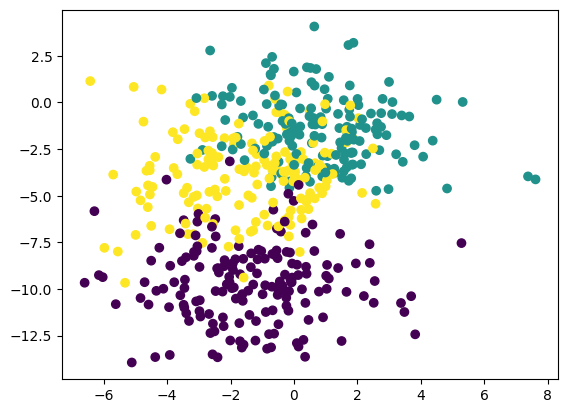

In [ ]:
plt.scatter(x_train[:,0], x_train[:,1], c = tf.argmax(y_train, axis=1))

### Experiments

#### Batch size = 256

Use your functions to train a network of 3 layers, with number of neurons = 2, 50 and 3 respectively.\
use num of epochs = 200, lr = 0.01, batch_size = 256.\
Use tf.data.Dataset.from_tensor_slices like we did it tutorial to generate the training dataset with the specified batch size.


In [ ]:
# batch_size =  .........
# num_epochs =  ..........
# lr =  ..........
# layer_dims =  ..........
# train_iter =  ................
# history, W, b =  ...................
# YOUR CODE STARTS HERE
batch_size = 256
num_epochs = 200
lr = 0.01
layer_dims = [2, 50, 3]
# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle and batch the dataset
train_iter = train_dataset.shuffle(1000).batch(batch_size)

# Train the model using the defined training loop
history, W, b = training_loop(train_iter, layer_dims,cross_entropy_loss , num_epochs, lr, batch_size)

# YOUR CODE ENDS HERE



Epoch 0: 


InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [256,11], In[1]: [50,2] [Op:MatMul] name: 

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Batch size = 128

In [ ]:
# Train the model using batch size = 128. (keep the rest of the hyperparameters with the same values as above)
# YOUR CODE STARTS HERE
batch_size = 128
num_epochs = 200
lr = 0.01
layer_dims = [2, 50, 3]
# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle and batch the dataset
train_iter = train_dataset.shuffle(1000).batch(batch_size)

# Train the model using the defined training loop
history, W, b = training_loop(train_iter, layer_dims,cross_entropy_loss , num_epochs, lr, batch_size)
# YOUR CODE ENDS HERE


Epoch 0: 


InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [128,11], In[1]: [2,50] [Op:MatMul] name: 

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Batch size = 16

In [ ]:
# Train the model using batch size = 16. (keep the rest of the hyperparameters with the same values as above)
# YOUR CODE STARTS HERE
batch_size = 16
num_epochs = 200
lr = 0.01
layer_dims = [2, 50, 3]
# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Shuffle and batch the dataset
train_iter = train_dataset.shuffle(1000).batch(batch_size)

# Train the model using the defined training loop
history, W, b = training_loop(train_iter, layer_dims,cross_entropy_loss , num_epochs, lr, batch_size)
# YOUR CODE ENDS HERE


Epoch 0: 


InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [16,11], In[1]: [2,50] [Op:MatMul] name: 

In [ ]:
# plotting the loss
plt.plot(history['train_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Question: What effect did you notice by changing the batch size ?

YOUR ANSWER HERE